In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
df = gpd.read_file("children_data.geojson")

# Importing our geojson file which was exported from the qgis project. 
# This file has the 3rd layer overlay (the child layer)


In [2]:
# Displaying list of all columns in the child layer. 
# The data all comes from the parents except for 'proportion_of_census_parent_area' and 'geometry', which are unique to the child
# We can reference associated parents via the 'zoning_parentid' and 'census_parentid

for col in df.columns:
    print(col)    

fid
objectid
date
districts
ordinance
hyperlink
overlay_type
status
type
notes
squaremile
acreage
edit_date
edit_by
st_areashape
st_lengthshape
zoning_parentid
zoning_parent_sqmeters
fid_2
objectid_2
statefp10
countyfp10
tractce10
blockce10
geoid10
name10
mtfcc10
ur10
uace10
funcstat10
aland10
awater10
intptlat10
intptlon10
total_pop
hisp_latino
not_hisp_latino
pop_one_race
white_alone
black_africamer_alone
amerind_aknat_alone
asian_alone
nathaw_pacisl_alone
other_race_alone
pop_two_or_more_races
over18_total_pop
over18_hisp_latino
over18_not_hisp_latino
over18_pop_one_race
over18_white_alone
over18_black_africamer_alone
over18_amerind_aknat_alone
over18_asian_alone
over18_nathaw_pacisl_alone
over18_other_race_alone
over18_pop_two_or_more_races
total_housing_units
occupied_housing_units
vacant_housing_units
st_areashape_2
st_lengthshape_2
census_parentid
census_parent_sqmeters
proportion_of_census_parent_area
geometry


In [3]:
#same as above - more concise view without scrolling
print(df.columns)

Index(['fid', 'objectid', 'date', 'districts', 'ordinance', 'hyperlink',
       'overlay_type', 'status', 'type', 'notes', 'squaremile', 'acreage',
       'edit_date', 'edit_by', 'st_areashape', 'st_lengthshape',
       'zoning_parentid', 'zoning_parent_sqmeters', 'fid_2', 'objectid_2',
       'statefp10', 'countyfp10', 'tractce10', 'blockce10', 'geoid10',
       'name10', 'mtfcc10', 'ur10', 'uace10', 'funcstat10', 'aland10',
       'awater10', 'intptlat10', 'intptlon10', 'total_pop', 'hisp_latino',
       'not_hisp_latino', 'pop_one_race', 'white_alone',
       'black_africamer_alone', 'amerind_aknat_alone', 'asian_alone',
       'nathaw_pacisl_alone', 'other_race_alone', 'pop_two_or_more_races',
       'over18_total_pop', 'over18_hisp_latino', 'over18_not_hisp_latino',
       'over18_pop_one_race', 'over18_white_alone',
       'over18_black_africamer_alone', 'over18_amerind_aknat_alone',
       'over18_asian_alone', 'over18_nathaw_pacisl_alone',
       'over18_other_race_alone', 'ove

In [4]:
# Making a list of column titles that we need divide in order to get continuous proportional child populations
pops_to_ration =[              
                'total_pop',
                'hisp_latino', 
                'not_hisp_latino', 
                'pop_one_race', 
                'white_alone',
                'black_africamer_alone', 
                'amerind_aknat_alone',
                'asian_alone',
                'nathaw_pacisl_alone',
                'other_race_alone',
                'pop_two_or_more_races',
                'over18_total_pop',
                'over18_hisp_latino',
                'over18_not_hisp_latino',
                'over18_pop_one_race',
                'over18_white_alone',
                'over18_black_africamer_alone',
                'over18_amerind_aknat_alone',
                'over18_asian_alone',
                'over18_nathaw_pacisl_alone',
                'over18_other_race_alone',
                'over18_pop_two_or_more_races',
                'total_housing_units',
                'occupied_housing_units',
                'vacant_housing_units',
                ] 

# I was going to automate this part, but just did it manually.

# Multiplying the parent value by the proportion of parent area, and adding it to new field with 'child' prefix
# This gives a continuous representation for the supposed population of each category inside the children.


df['child_total_pop'] = df['total_pop']*df['proportion_of_census_parent_area']
df['child_hisp_latino'] = df['hisp_latino']*df['proportion_of_census_parent_area']
df['child_not_hisp_latino'] = df['not_hisp_latino']*df['proportion_of_census_parent_area']
df['child_pop_one_race'] = df['pop_one_race']*df['proportion_of_census_parent_area']
df['child_white_alone'] = df['white_alone']*df['proportion_of_census_parent_area']
df['child_black_africamer_alone'] = df['black_africamer_alone']*df['proportion_of_census_parent_area']
df['child_amerind_aknat_alone'] = df['amerind_aknat_alone']*df['proportion_of_census_parent_area']
df['child_asian_alone'] = df['asian_alone']*df['proportion_of_census_parent_area']
df['child_nathaw_pacisl_alone'] = df['nathaw_pacisl_alone']*df['proportion_of_census_parent_area']
df['child_other_race_alone'] = df['other_race_alone']*df['proportion_of_census_parent_area']
df['child_pop_two_or_more_races'] = df['pop_two_or_more_races']*df['proportion_of_census_parent_area']
df['child_over18_total_pop'] = df['over18_total_pop']*df['proportion_of_census_parent_area']
df['child_over18_hisp_latino'] = df['over18_hisp_latino']*df['proportion_of_census_parent_area']
df['child_over18_not_hisp_latino'] = df['over18_not_hisp_latino']*df['proportion_of_census_parent_area']
df['child_over18_pop_one_race'] = df['over18_pop_one_race']*df['proportion_of_census_parent_area']
df['child_over18_white_alone'] = df['over18_white_alone']*df['proportion_of_census_parent_area']
df['child_over18_black_africamer_alone'] = df['over18_black_africamer_alone']*df['proportion_of_census_parent_area']
df['child_over18_amerind_aknat_alone'] = df['over18_amerind_aknat_alone']*df['proportion_of_census_parent_area']
df['child_over18_asian_alone'] = df['over18_asian_alone']*df['proportion_of_census_parent_area']
df['child_over18_nathaw_pacisl_alone'] = df['over18_nathaw_pacisl_alone']*df['proportion_of_census_parent_area']
df['child_over18_other_race_alone'] = df['over18_other_race_alone']*df['proportion_of_census_parent_area']
df['child_over18_pop_two_or_more_races'] = df['over18_pop_two_or_more_races']*df['proportion_of_census_parent_area']
df['child_total_housing_units'] = df['total_housing_units']*df['proportion_of_census_parent_area']
df['child_occupied_housing_units'] = df['occupied_housing_units']*df['proportion_of_census_parent_area']
df['child_vacant_housing_units'] = df['vacant_housing_units']*df['proportion_of_census_parent_area']


# Now in order to get densities, we take these individual populations and divide by the child_total_pop
#excluding total_pop because density will be 1, obviously.
df['child_hisp_latino_density'] = df['child_hisp_latino']/df['child_total_pop']
df['child_not_hisp_latino_density'] = df['child_not_hisp_latino']/df['child_total_pop']
df['child_pop_one_race_density'] = df['child_pop_one_race']/df['child_total_pop']
df['child_white_alone_density'] = df['child_white_alone']/df['child_total_pop']
df['child_black_africamer_alone_density'] = df['child_black_africamer_alone']/df['child_total_pop']
df['child_amerind_aknat_alone_density'] = df['child_amerind_aknat_alone']/df['child_total_pop']
df['child_asian_alone_density'] = df['child_asian_alone']/df['child_total_pop']
df['child_nathaw_pacisl_alone_density'] = df['child_nathaw_pacisl_alone']/df['child_total_pop']
df['child_other_race_alone_density'] = df['child_other_race_alone']/df['child_total_pop']
df['child_pop_two_or_more_races_density'] = df['child_pop_two_or_more_races']/df['child_total_pop']
df['child_over18_total_pop_density'] = df['child_over18_total_pop']/df['child_total_pop']
df['child_over18_hisp_latino_density'] = df['child_over18_hisp_latino']/df['child_total_pop']
df['child_over18_not_hisp_latino_density'] = df['child_over18_not_hisp_latino']/df['child_total_pop']
df['child_over18_pop_one_race_density'] = df['child_over18_pop_one_race']/df['child_total_pop']
df['child_over18_white_alone_density'] = df['child_over18_white_alone']/df['child_total_pop']
df['child_over18_black_africamer_alone_density'] = df['child_over18_black_africamer_alone']/df['child_total_pop']
df['child_over18_amerind_aknat_alone_density'] = df['child_over18_amerind_aknat_alone']/df['child_total_pop']
df['child_over18_asian_alone_density'] = df['child_over18_asian_alone']/df['child_total_pop']
df['child_over18_nathaw_pacisl_alone_density'] = df['child_over18_nathaw_pacisl_alone']/df['child_total_pop']
df['child_over18_other_race_alone_density'] = df['child_over18_other_race_alone']/df['child_total_pop']
df['child_over18_pop_two_or_more_races_density'] = df['child_over18_pop_two_or_more_races']/df['child_total_pop']
df['child_total_housing_units_density'] = df['child_total_housing_units']/df['child_total_pop']
df['child_occupied_housing_units_density'] = df['child_occupied_housing_units']/df['child_total_pop']
df['child_vacant_housing_units_density'] = df['child_vacant_housing_units']/df['child_total_pop']

# Adding a new field for overall pop density
df['child_total_pop_density_per_sq_meters'] = df['census_parent_sqmeters']*df['proportion_of_census_parent_area']



In [5]:
# Making a new dataframe that only has the columns we want to look at (removing old parent data)

children = df[[
        'districts',
        'child_total_pop_density_per_sq_meters',        
        'child_hisp_latino_density',
        'child_not_hisp_latino_density',
        'child_pop_one_race_density',     
        'child_white_alone_density',
        'child_black_africamer_alone_density',
        'child_amerind_aknat_alone_density',
        'child_asian_alone_density',
        'child_nathaw_pacisl_alone_density',
        'child_other_race_alone_density',
        'child_pop_two_or_more_races_density',
        'child_over18_total_pop_density',
        'child_over18_hisp_latino_density',
        'child_over18_not_hisp_latino_density',
        'child_over18_pop_one_race_density',
        'child_over18_white_alone_density',
        'child_over18_black_africamer_alone_density',
        'child_over18_amerind_aknat_alone_density',
        'child_over18_asian_alone_density',
        'child_over18_nathaw_pacisl_alone_density',
        'child_over18_other_race_alone_density',
        'child_over18_pop_two_or_more_races_density',
        'child_total_housing_units_density',
        'child_occupied_housing_units_density',
        'child_vacant_housing_units_density',
        ]]


In [6]:
children

,districts,child_total_pop_density_per_sq_meters,child_hisp_latino_density,child_not_hisp_latino_density,child_pop_one_race_density,child_white_alone_density,child_black_africamer_alone_density,child_amerind_aknat_alone_density,child_asian_alone_density,child_nathaw_pacisl_alone_density,...,child_over18_white_alone_density,child_over18_black_africamer_alone_density,child_over18_amerind_aknat_alone_density,child_over18_asian_alone_density,child_over18_nathaw_pacisl_alone_density,child_over18_other_race_alone_density,child_over18_pop_two_or_more_races_density,child_total_housing_units_density,child_occupied_housing_units_density,child_vacant_housing_units_density
0,RS2,10273.494769,1.0,0.050000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,...,0.575000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.287500,0.275000,0.012500
1,RS2,230941.735276,1.0,0.009153,0.993135,0.935927,0.006865,0.0,0.050343,0.0,...,0.549199,0.004577,0.0,0.034325,0.0,0.000000,0.002288,0.297483,0.283753,0.013730
2,RS2,172197.625578,1.0,0.000000,1.000000,0.977011,0.000000,0.0,0.022989,0.0,...,0.609195,0.000000,0.0,0.022989,0.0,0.000000,0.000000,0.344828,0.310345,0.034483
3,RS2,3997.602100,1.0,0.013793,1.000000,0.958621,0.013793,0.0,0.027586,0.0,...,0.724138,0.013793,0.0,0.013793,0.0,0.000000,0.000000,0.413793,0.386207,0.027586
4,RS2,1381.348806,1.0,0.006329,1.000000,0.981013,0.000000,0.0,0.006329,0.0,...,0.740506,0.000000,0.0,0.000000,0.0,0.012658,0.000000,0.430380,0.405063,0.025316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,INST,53462.080845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5288,INST,648.916300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5289,INST,2623.751867,1.0,0.133858,0.960630,0.763780,0.086614,0.0,0.007874,0.0,...,0.598425,0.055118,0.0,0.007874,0.0,0.070866,0.015748,0.448819,0.401575,0.047244
5290,COM EXP,180934.182758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

print("These are all of the 'districts' present in our data. This is the Zoning district.")
print(children.districts.unique())


These are all of the 'districts' present in our data. This is the Zoning district.
['RS2' 'RES EXP' 'RM16' 'RS8' 'INST' 'IND' 'RM8' 'HB' 'CBI' 'CBII' 'RS4'
 'CBD' 'UP' 'RB' 'CI' 'OFFICE' 'RAD-RIV' 'RESORT' 'CBD EXP' 'RAD-OSP'
 'RM6' 'HR-7:TC' 'UV' 'MXD EXP' 'NB' 'RIVER' 'NOT ZONED' 'OB' 'URD'
 'LODG EXP' 'NCD' 'O2' 'HR-2:EXPN' 'HR-1:CORE' 'COM EXP' 'RAD-LYH'
 'INST EXP' 'RAD-IND' 'HR-6:TOWN' 'HCU' 'HR-4:TRAD' 'RAD-SHP' 'LI'
 'CBII EXP' 'RAD-RES' 'HR-3:CRDR' 'RAD-NT']


In [8]:
# These are the densities that we want to plot as our Y value against the districts. 
# The district is X value because it is the independent variable
yVals=['child_total_pop_density_per_sq_meters' ,      
        'child_hisp_latino_density',
        'child_not_hisp_latino_density',
        'child_pop_one_race_density',     
        'child_white_alone_density',
        'child_black_africamer_alone_density',
        'child_amerind_aknat_alone_density',
        'child_asian_alone_density',
        'child_nathaw_pacisl_alone_density',
        'child_other_race_alone_density',
        'child_pop_two_or_more_races_density',
        'child_over18_total_pop_density',
        'child_over18_hisp_latino_density',
        'child_over18_not_hisp_latino_density',
        'child_over18_pop_one_race_density',
        'child_over18_white_alone_density',
        'child_over18_black_africamer_alone_density',
        'child_over18_amerind_aknat_alone_density',
        'child_over18_asian_alone_density',
        'child_over18_nathaw_pacisl_alone_density',
        'child_over18_other_race_alone_density',
        'child_over18_pop_two_or_more_races_density',
        'child_total_housing_units_density',
        'child_occupied_housing_units_density',
        'child_vacant_housing_units_density',
      ]

# pandas default plot method
#children.plot.scatter(y=yValue, x='districts')

#matplotlib individual plot method
#plt.figure(figsize=(25,10))
# plt.scatter(x=children['districts'], y=children['child_vacant_housing_units_density'])


# for yValue in yVals:
#     plt.figure(figsize=(25,10))
#     plt.scatter(x=children['districts'], y=children[yValue])
#     plt.ylabel(yValue)
#     plt.xlabel('Zoning District')
#     plt.show()



In [21]:

# Getting the average of each density per district by performing an aggregate functions:
group_by_district = children.groupby(by=['districts']).apply(list)
# print(group_by_district)
# print(group_by_district['CBD']['child_total_pop_density_per_sq_meters'])

# means = group_by_district.mean()
# means



TypeError: list indices must be integers or slices, not str

In [10]:
# corrMatrix = children.corr()
# print (corrMatrix)

# Simple correlation matix won't work here because it only operates on numeric values.

In [11]:
#from scipy.stats import f_oneway

# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
# f_oneway performs Anova, which tests a null hypothesis
#Anova test will return 2 values, F statistic and pvalue. 
# F=0 means no correlation.
# dist_groups = children.groupby('districts')['child_total_pop_density_per_sq_meters'].apply(list)


# anova = f_oneway(children[children.districts=="CBD"].child_total_pop_density_per_sq_meters,
#                 children[children.districts=="RM6"].child_total_pop_density_per_sq_meters,
#                 )

# print(anova)
# # AnovaTestResult = f_oneway(*dist_groups)
# print(AnovaTestResult)

In [13]:
# #!pip install seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(25,10))
# for yValue in yVals:
#     print(yValue)
#     fig = sns.scatterplot(data=children, x='districts',y=yValue)
#     fig.show()

# fig = sns.scatterplot(data=children, x='districts',y='child_total_pop_density_per_sq_meters')
# fig2 = sns.scatterplot(data=children, x='districts',y='child_hisp_latino_density')


# fig.show()

In [46]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [32]:
corrMatrix = children.corr()
print (corrMatrix['child_total_pop_density_per_sq_meters'])

child_total_pop_density_per_sq_meters         1.000000
child_hisp_latino_density                          NaN
child_not_hisp_latino_density                -0.013131
child_pop_one_race_density                    0.017551
child_white_alone_density                     0.053889
child_black_africamer_alone_density          -0.044647
child_amerind_aknat_alone_density            -0.006865
child_asian_alone_density                    -0.015031
child_nathaw_pacisl_alone_density            -0.011749
child_other_race_alone_density               -0.013160
child_pop_two_or_more_races_density          -0.017551
child_over18_total_pop_density               -0.037228
child_over18_hisp_latino_density             -0.021472
child_over18_not_hisp_latino_density         -0.015897
child_over18_pop_one_race_density            -0.024774
child_over18_white_alone_density              0.034950
child_over18_black_africamer_alone_density   -0.053126
child_over18_amerind_aknat_alone_density     -0.009551
child_over

1.0


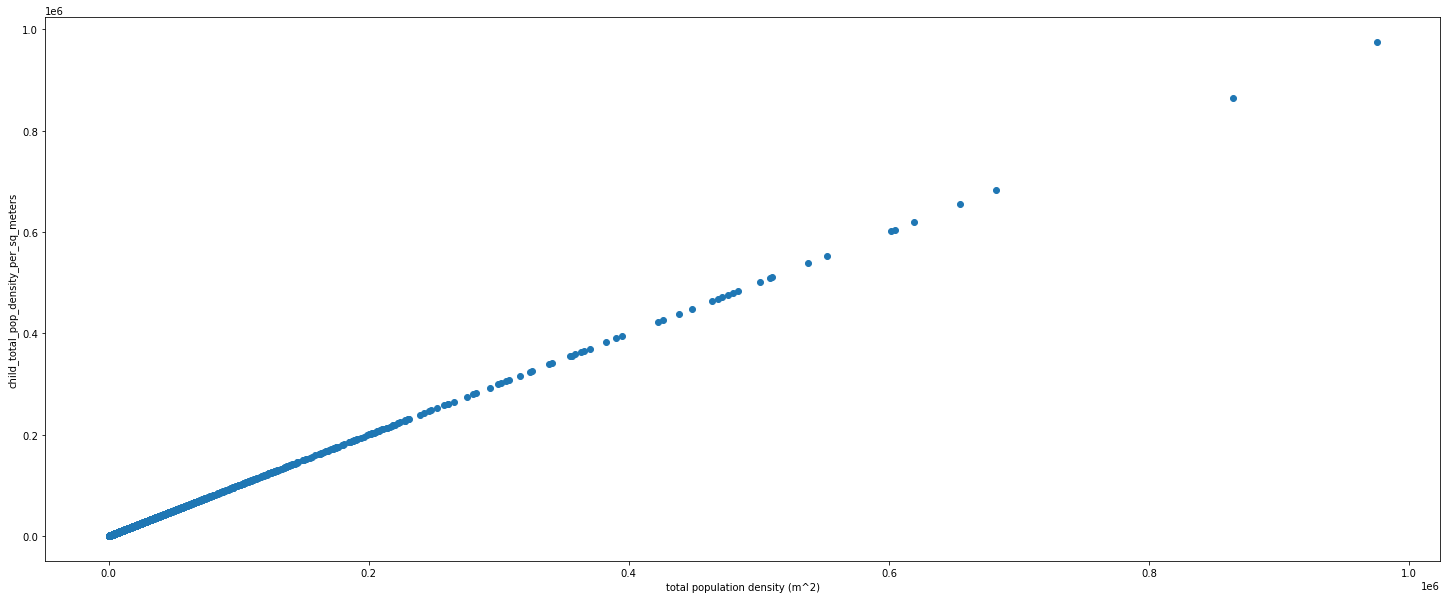

nan


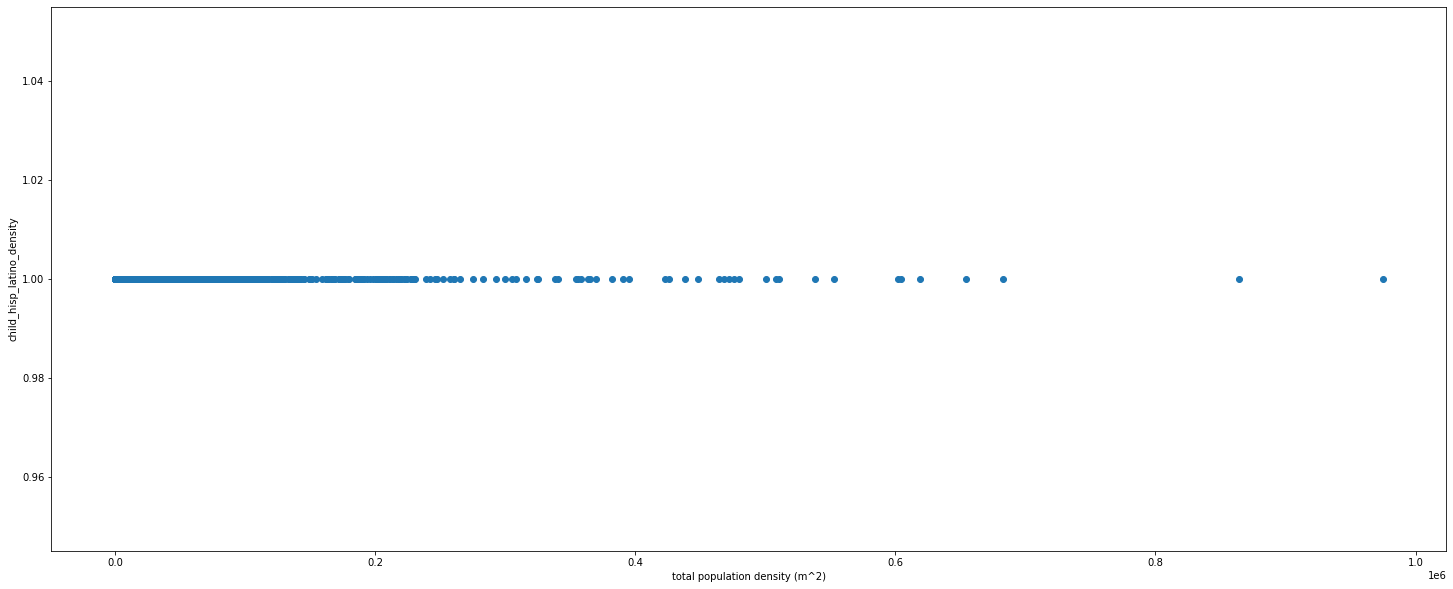

-0.013130521880336738


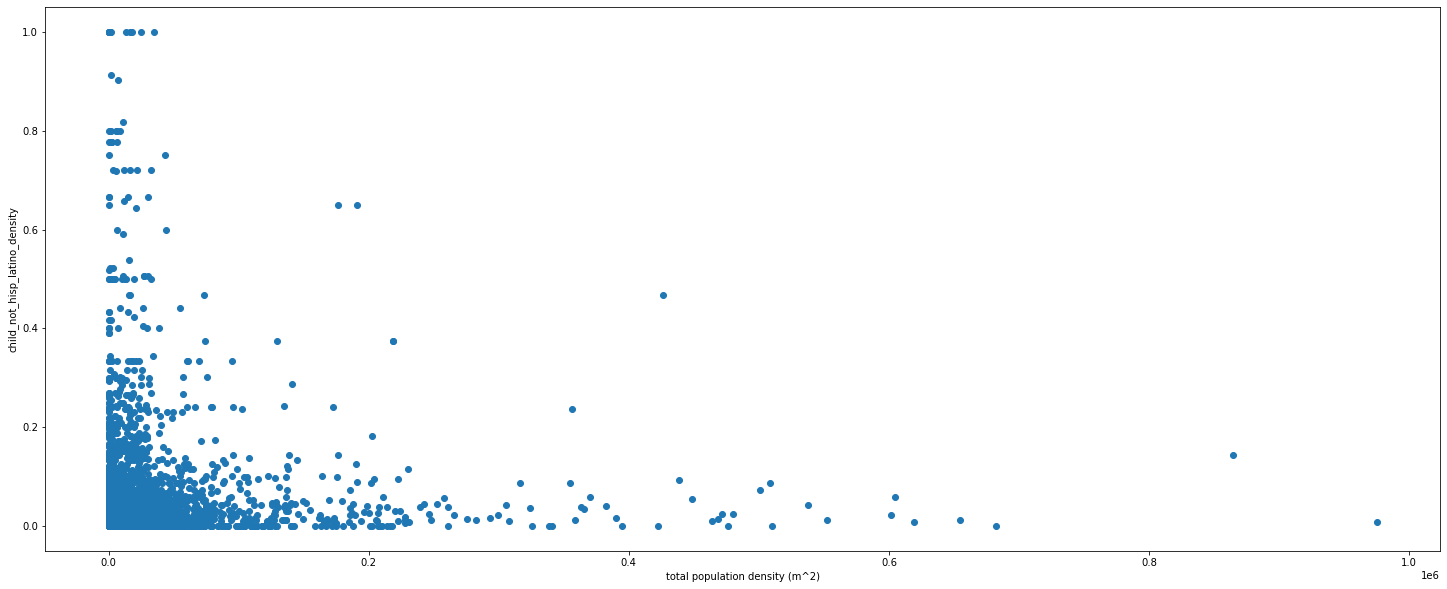

0.01755050323001777


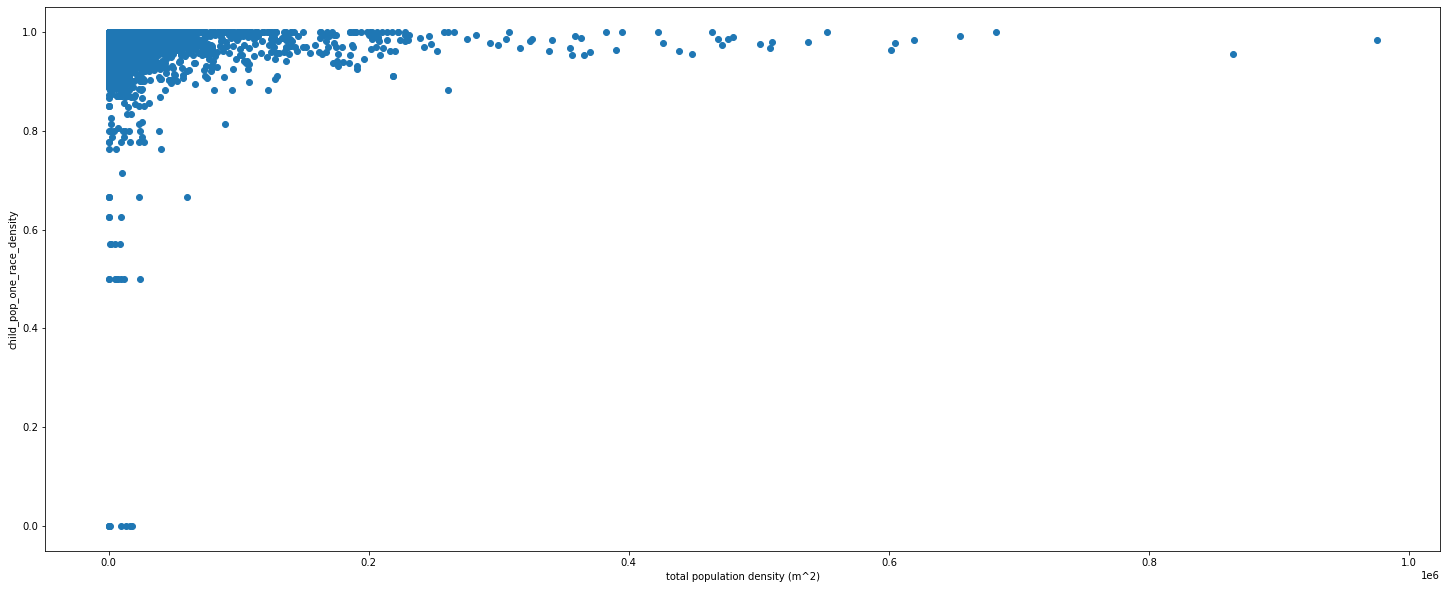

0.053889300643098596


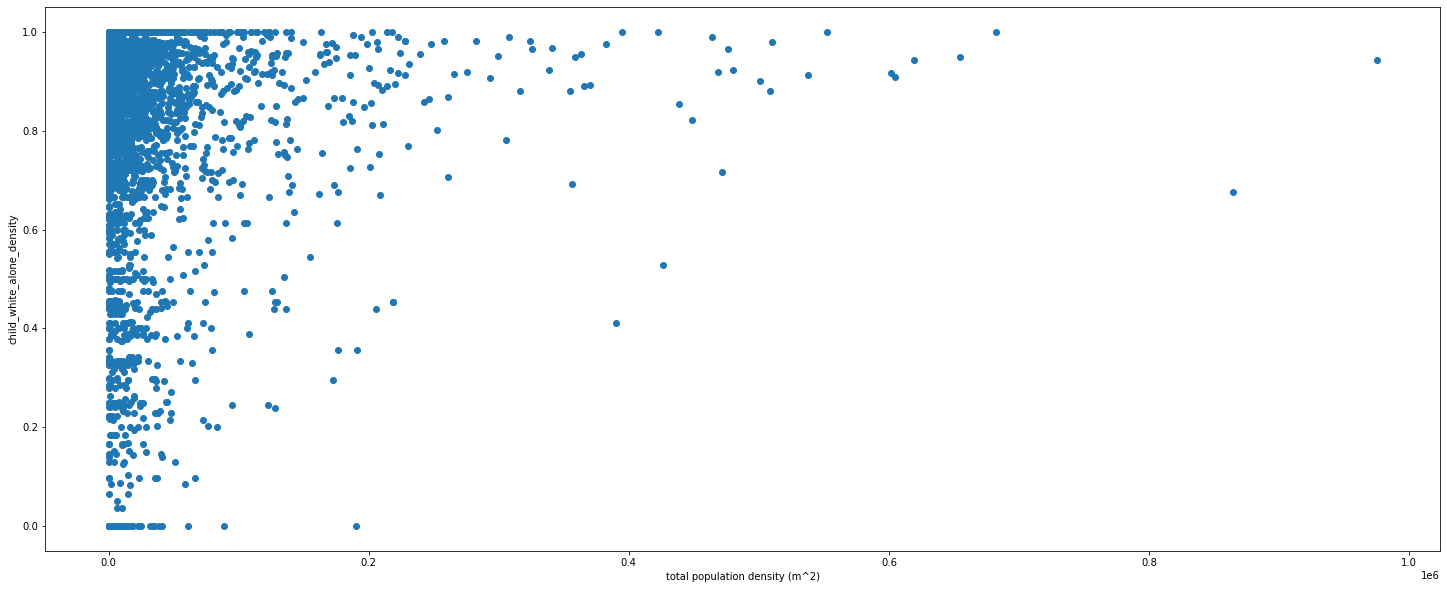

-0.04464663752581981


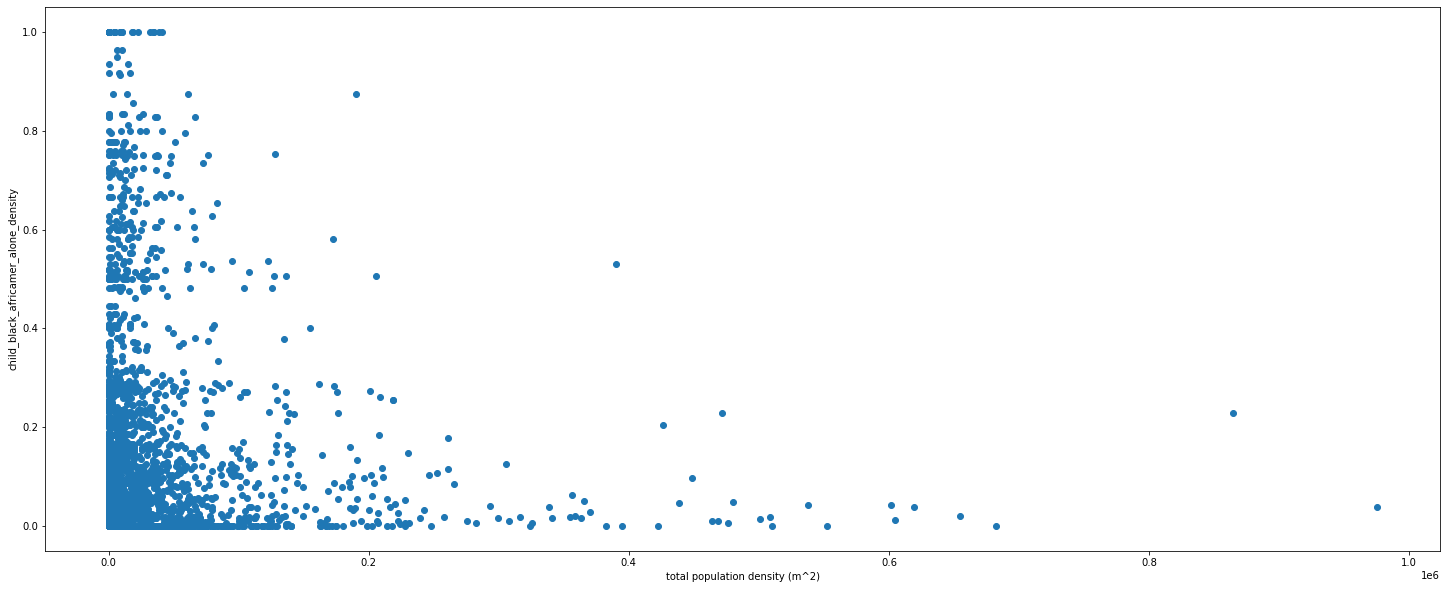

-0.006865122811055788


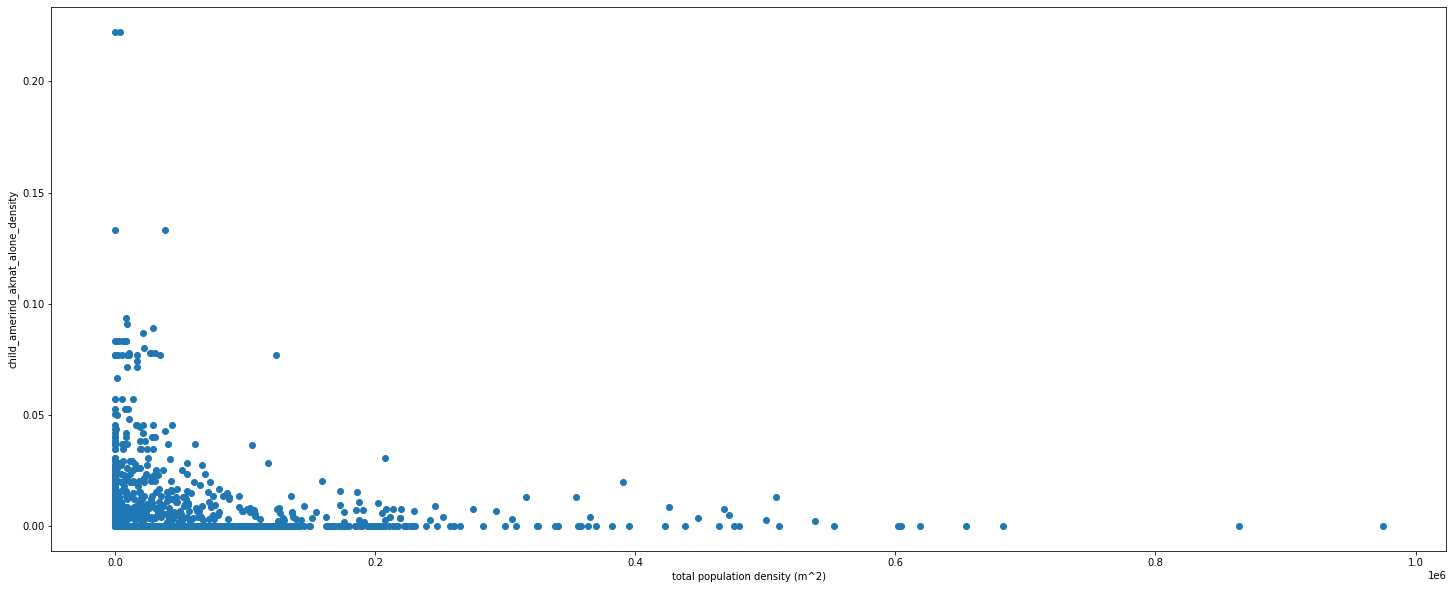

-0.015030636979101304


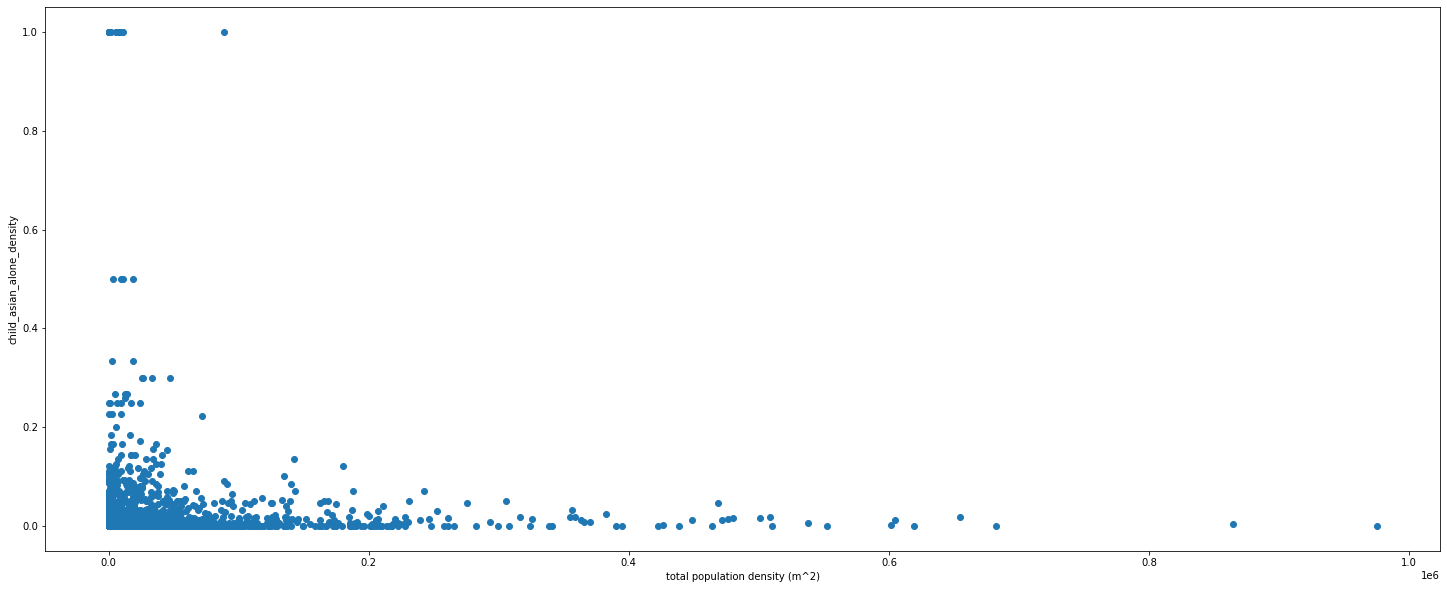

-0.011749010231276344


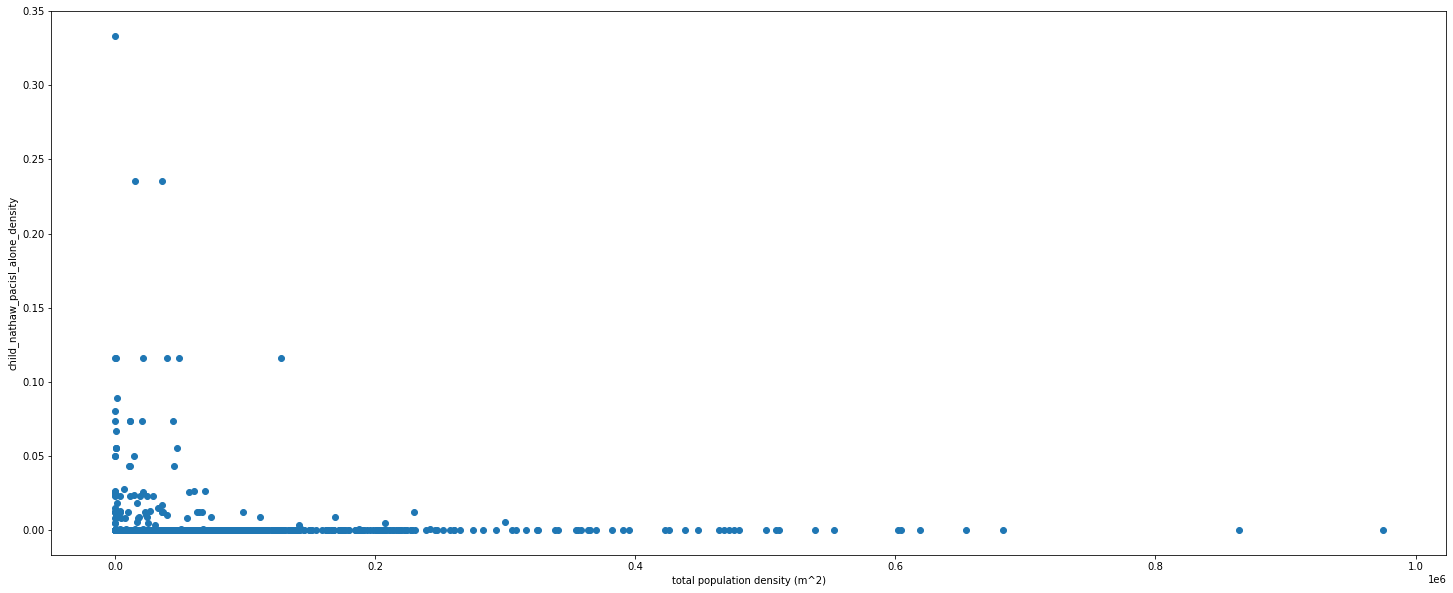

-0.013159859591480255


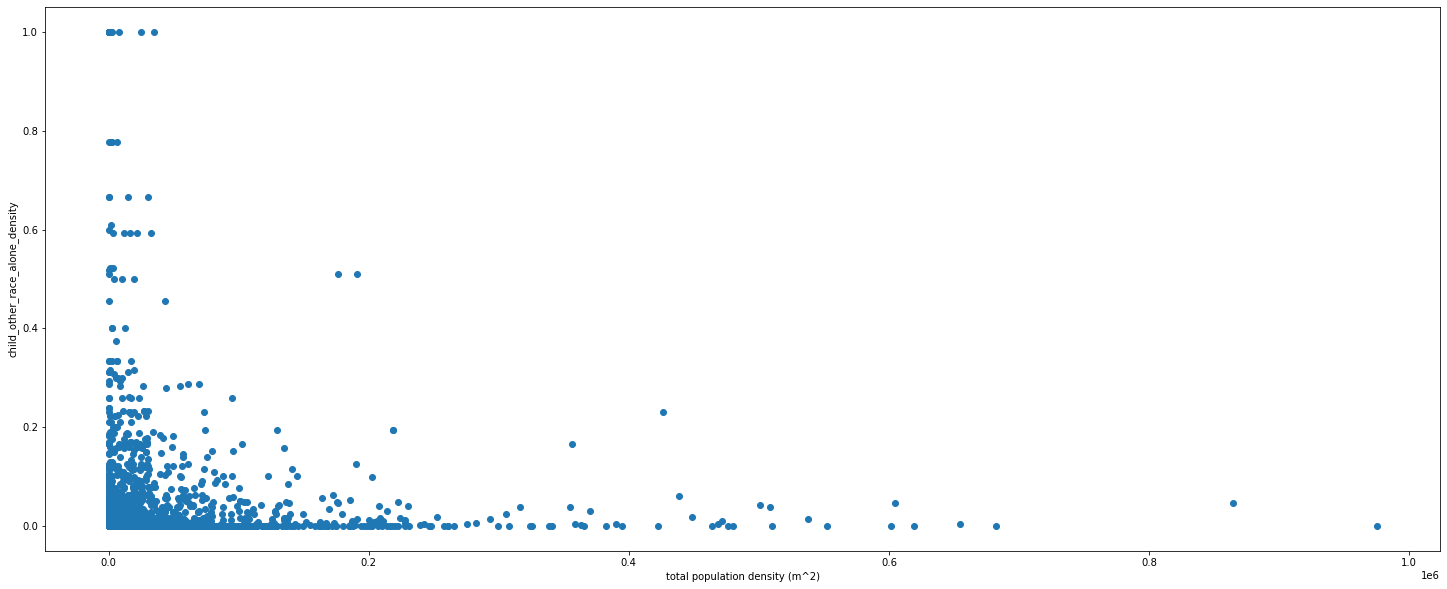

-0.017550503230017764


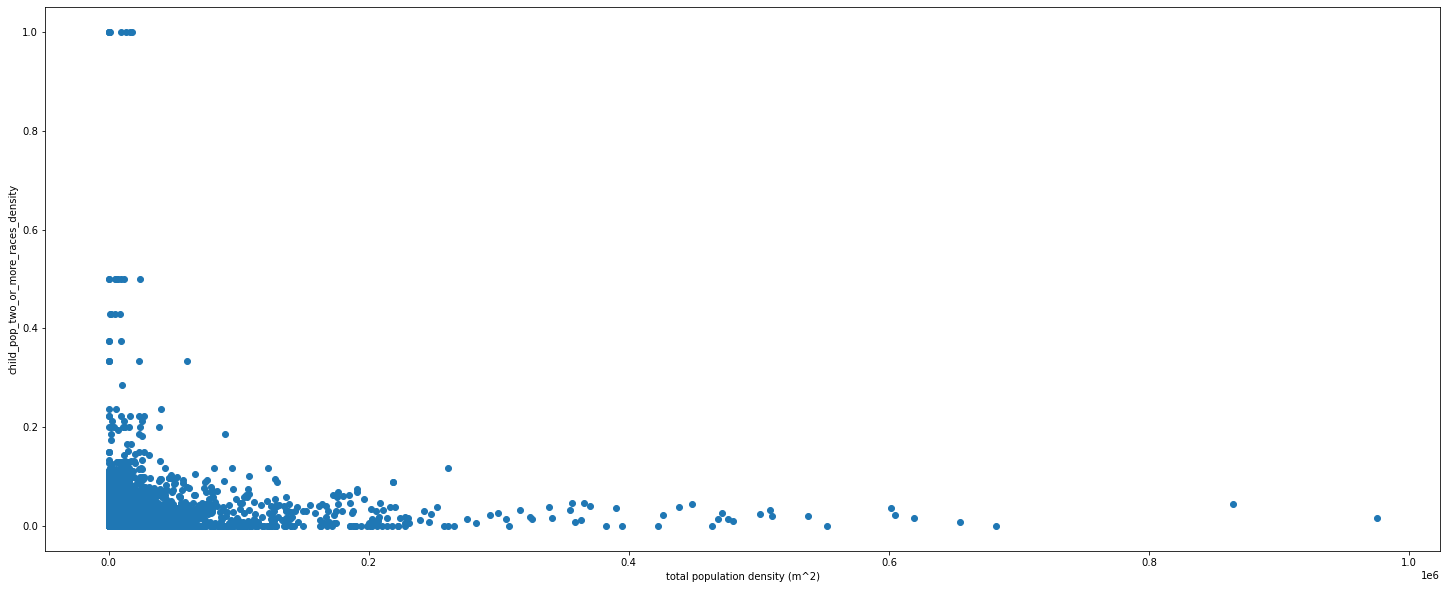

-0.03722796756715947


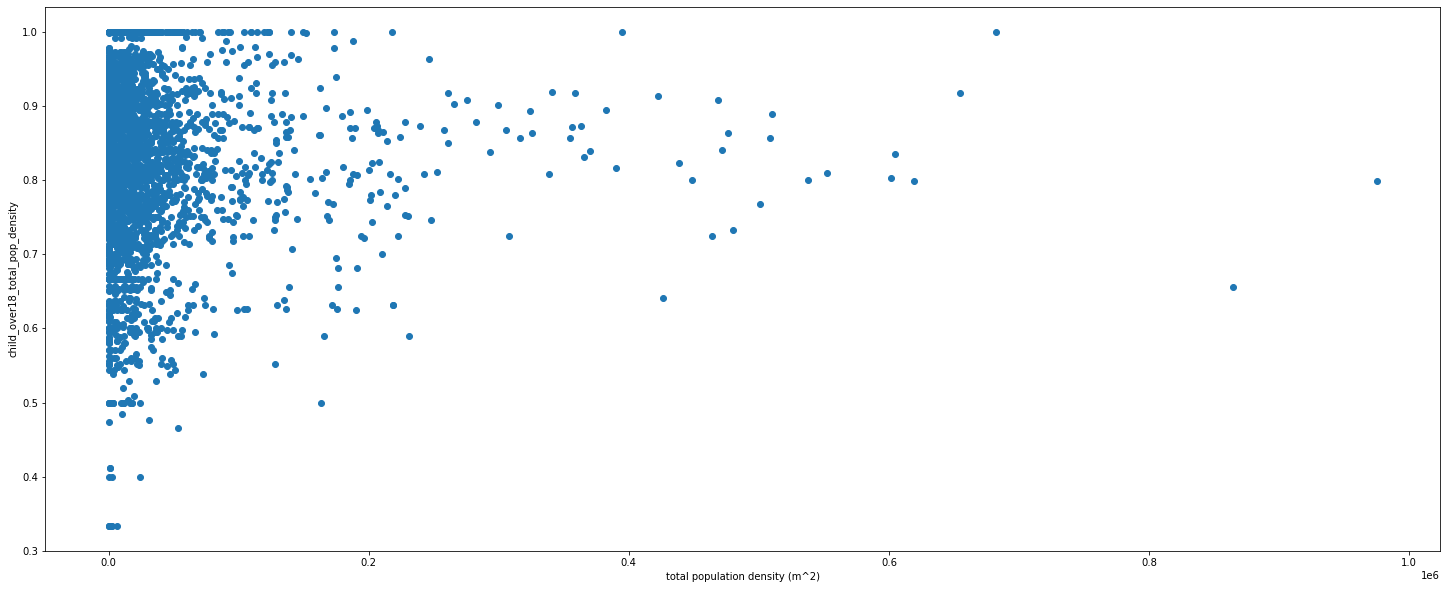

-0.02147168875724585


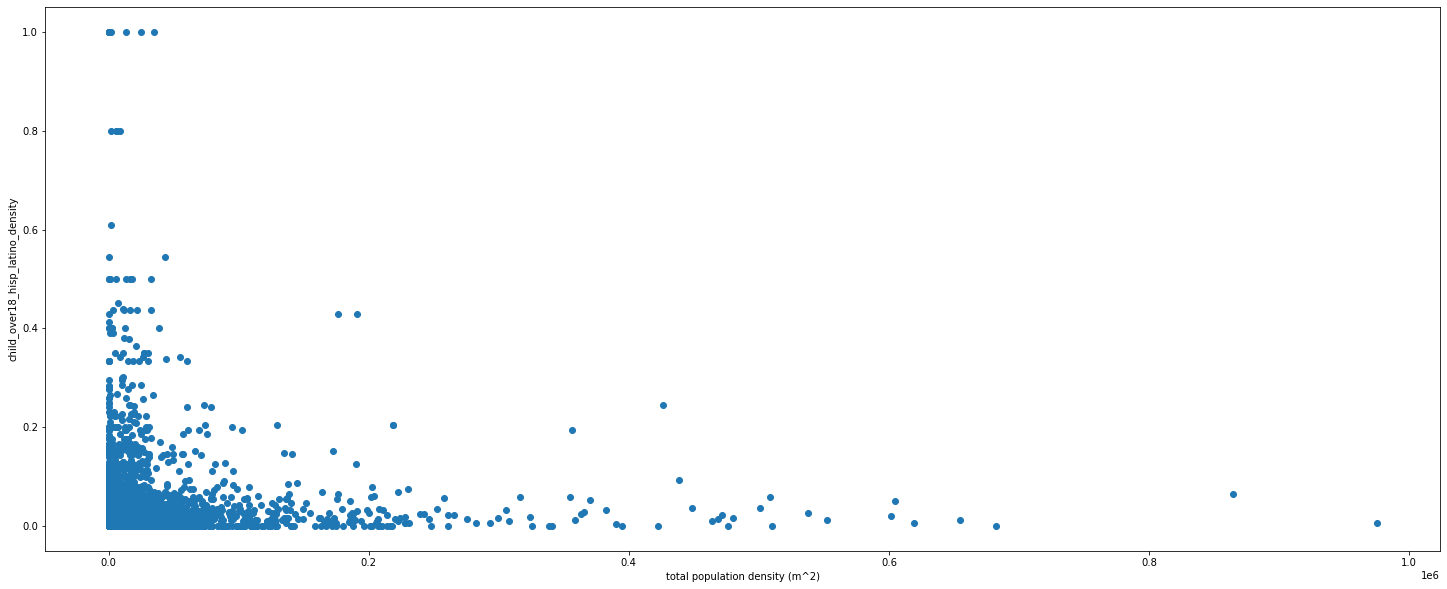

-0.015896802873275967


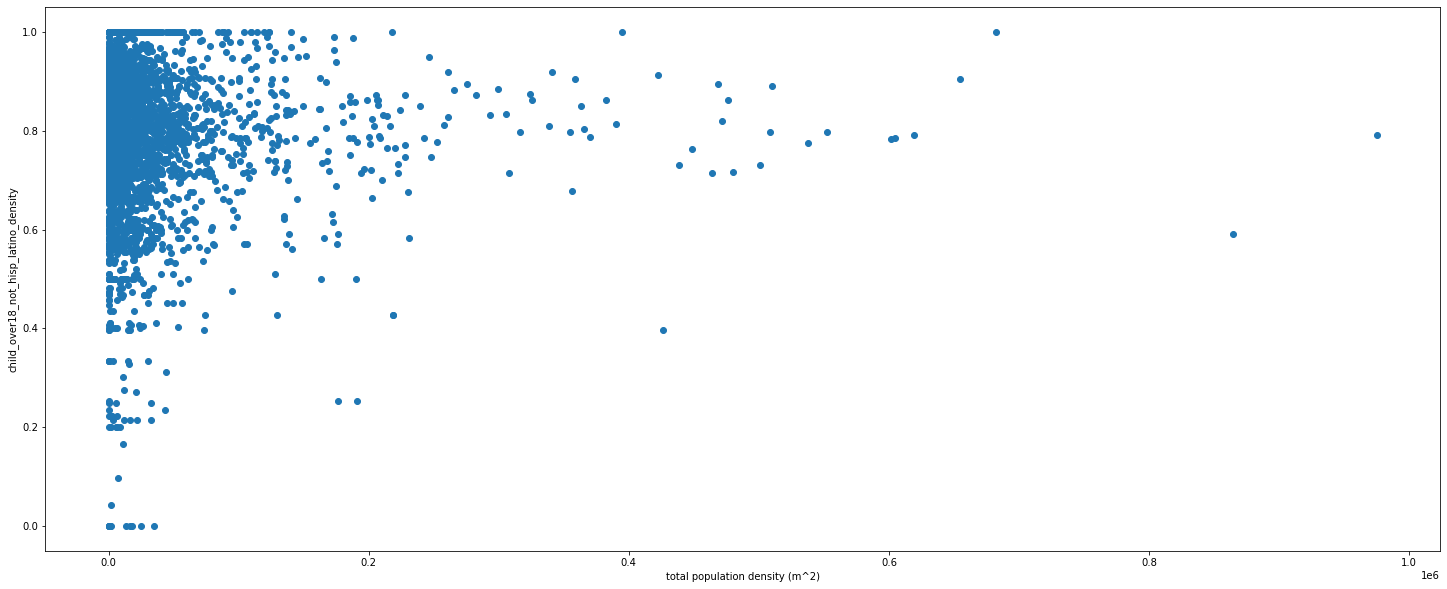

-0.024774004374984192


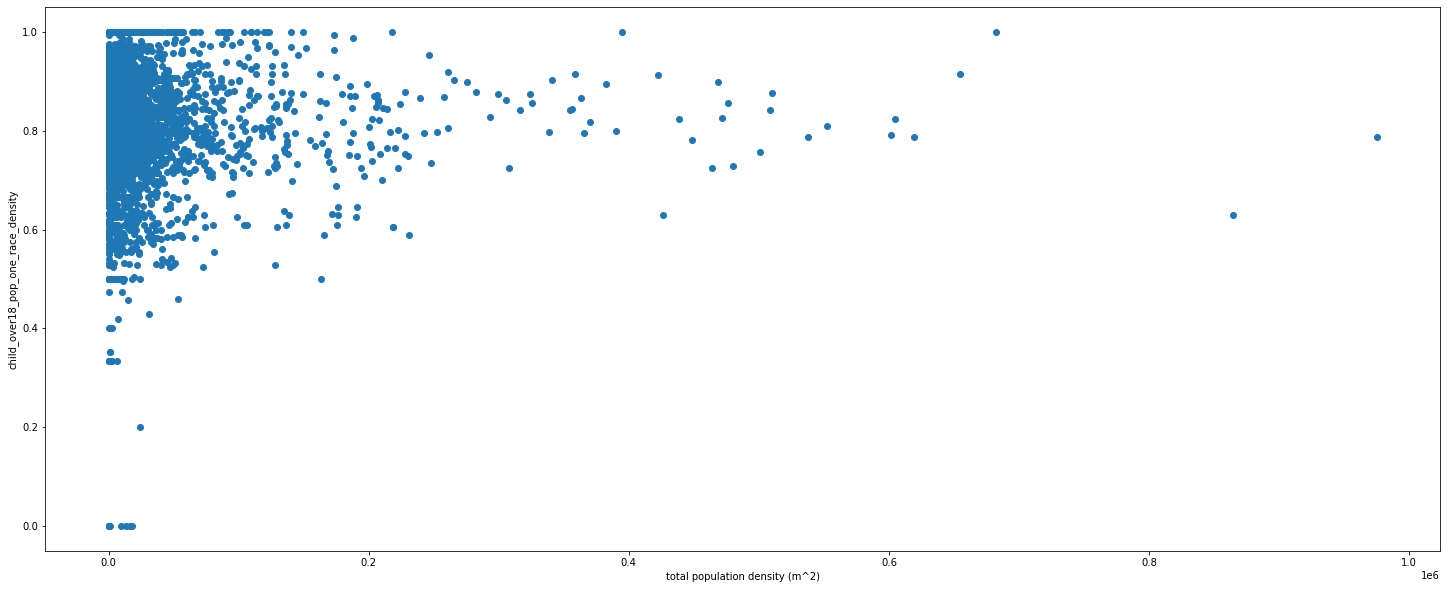

0.03495022017307877


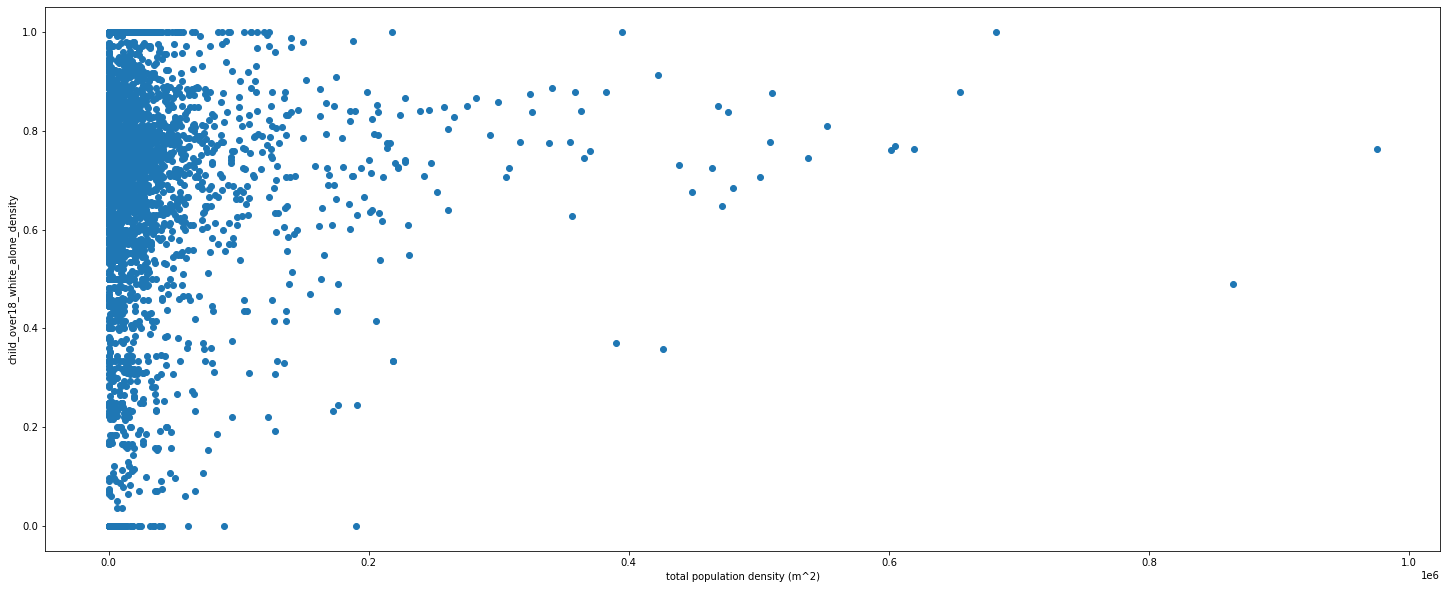

-0.05312591486430597


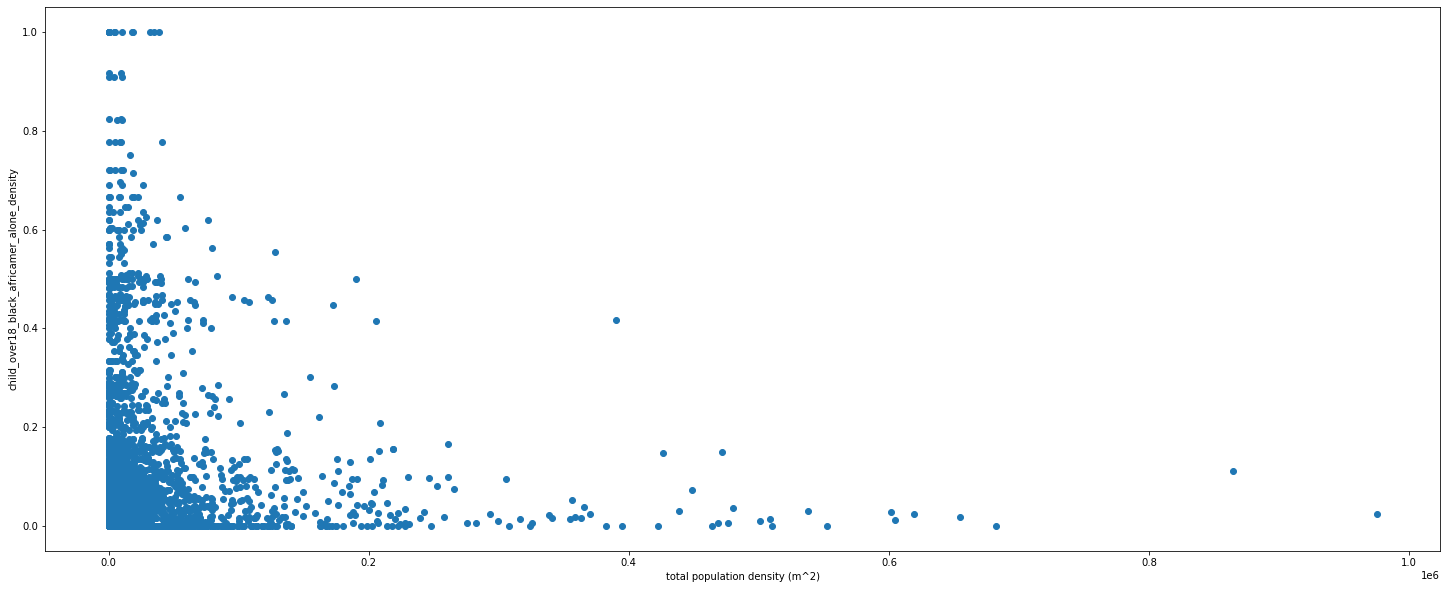

-0.009550786222333392


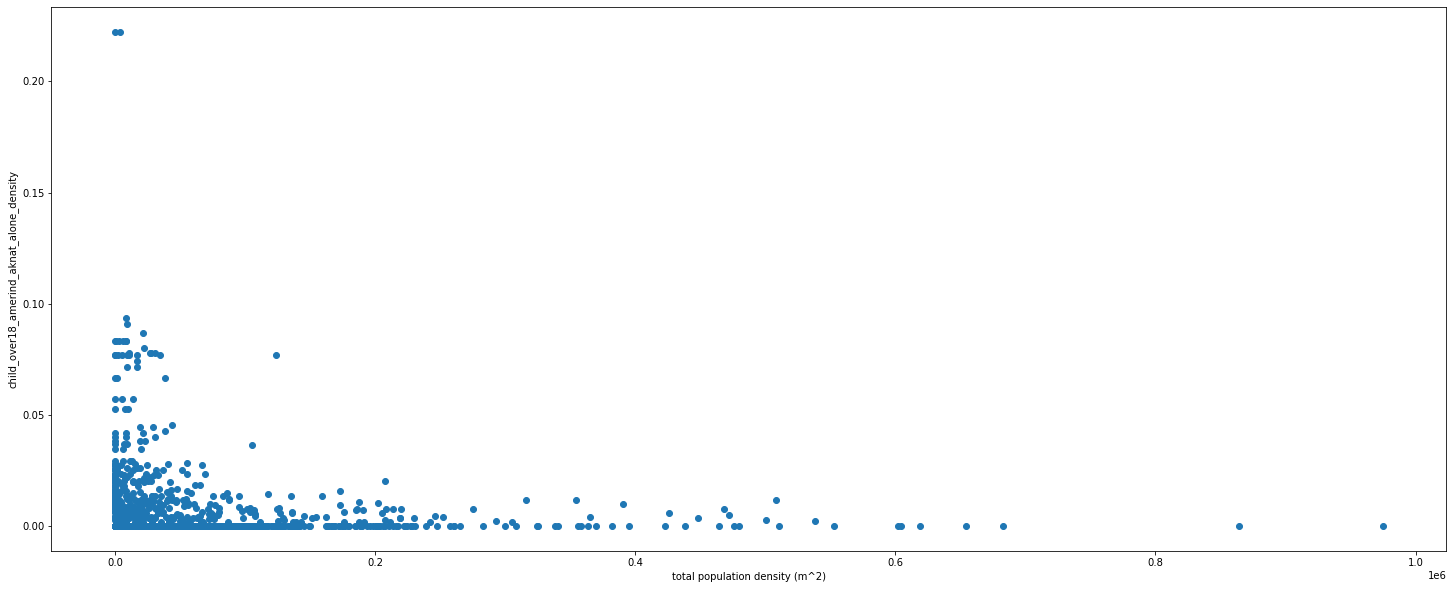

-0.017691717249540814


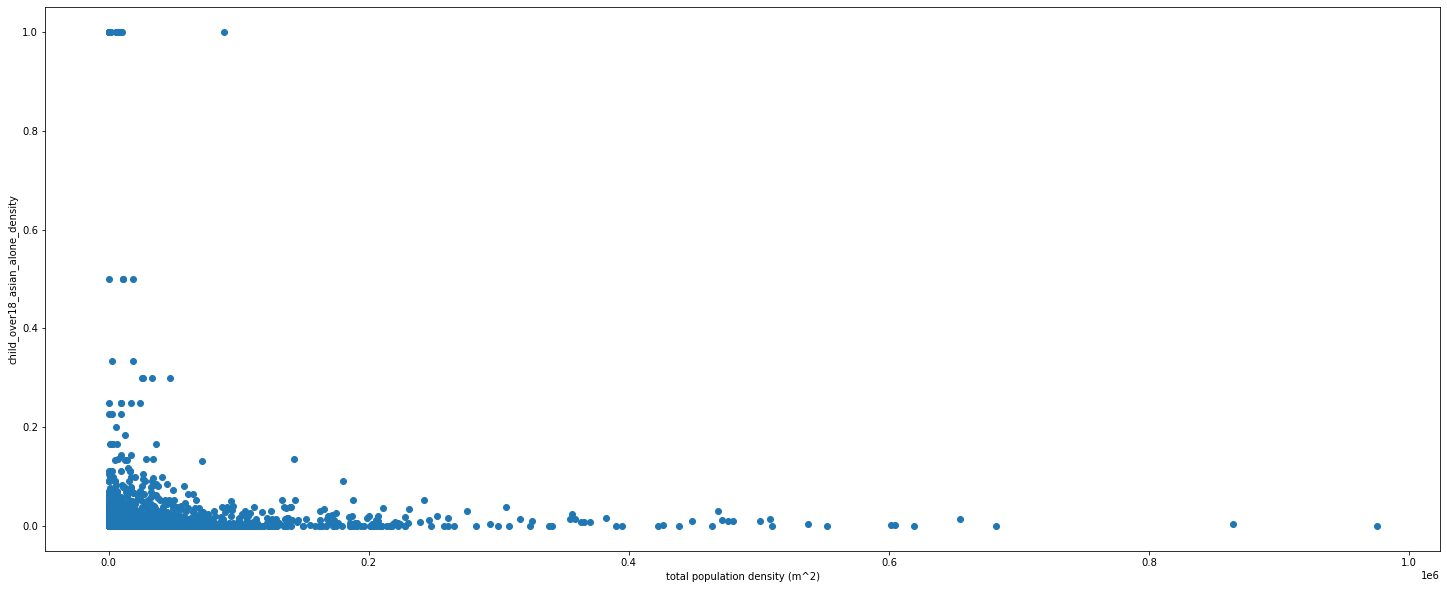

-0.014140571523489178


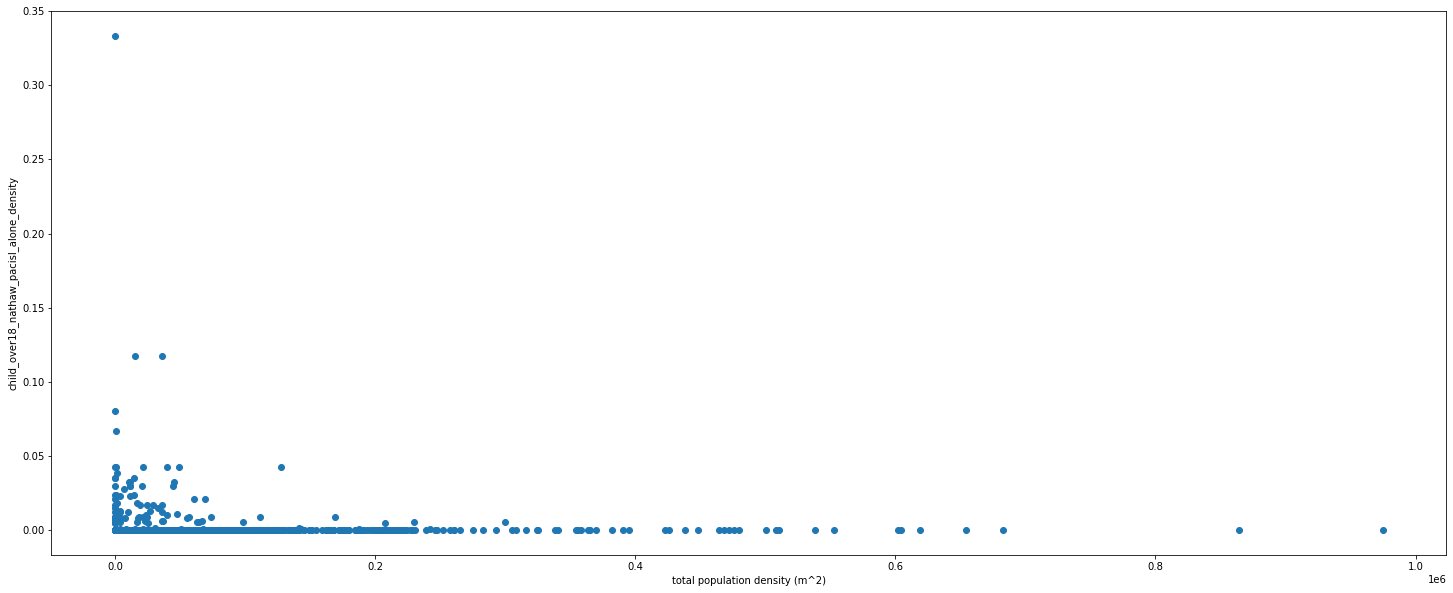

-0.014818742894050625


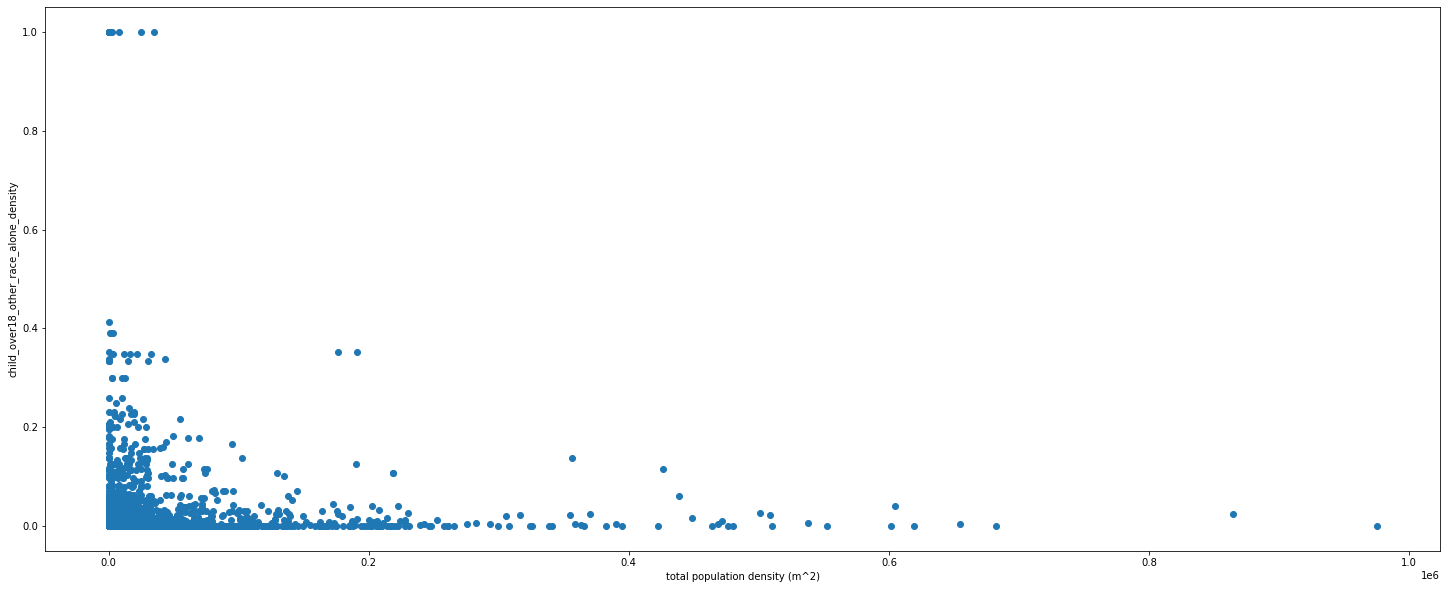

-0.022692079717147172


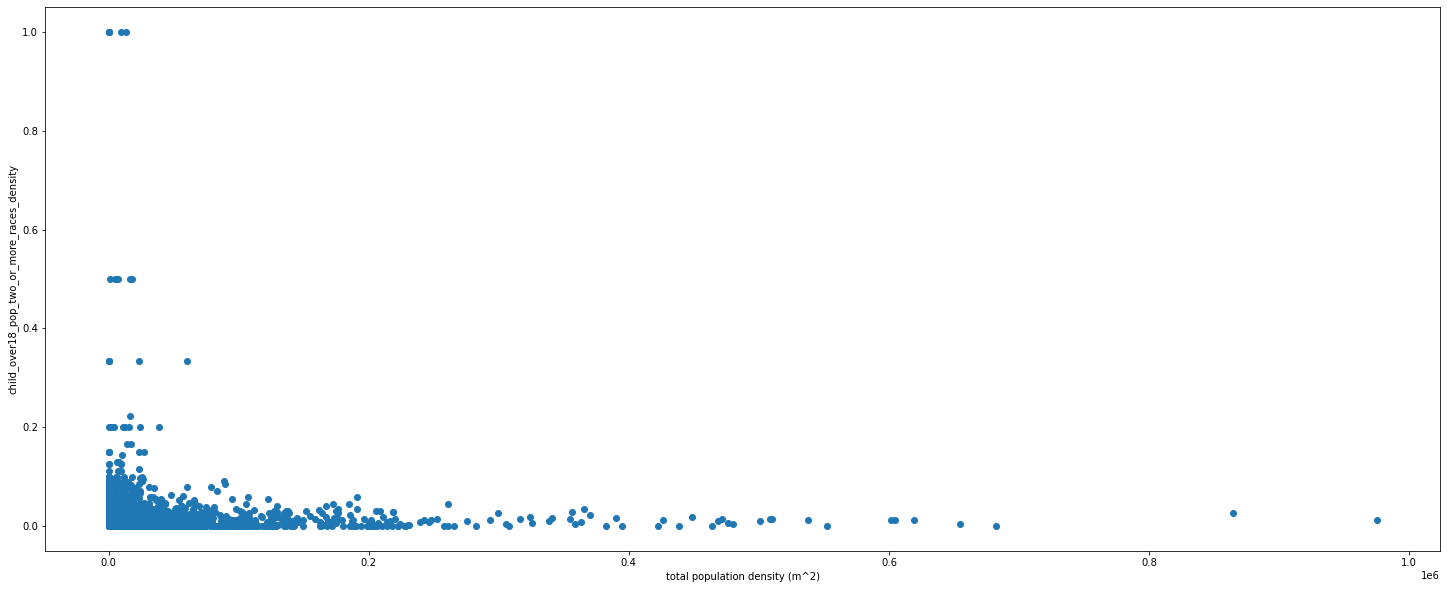

-0.05393296272361002


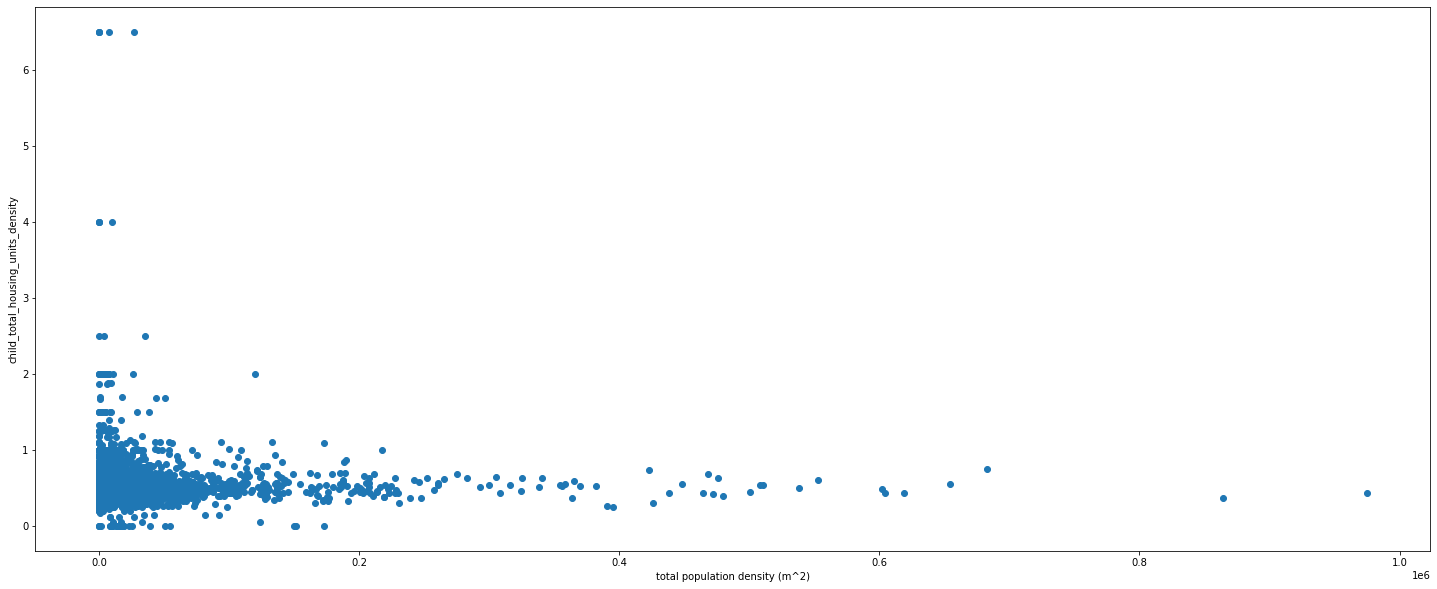

-0.05871625021371959


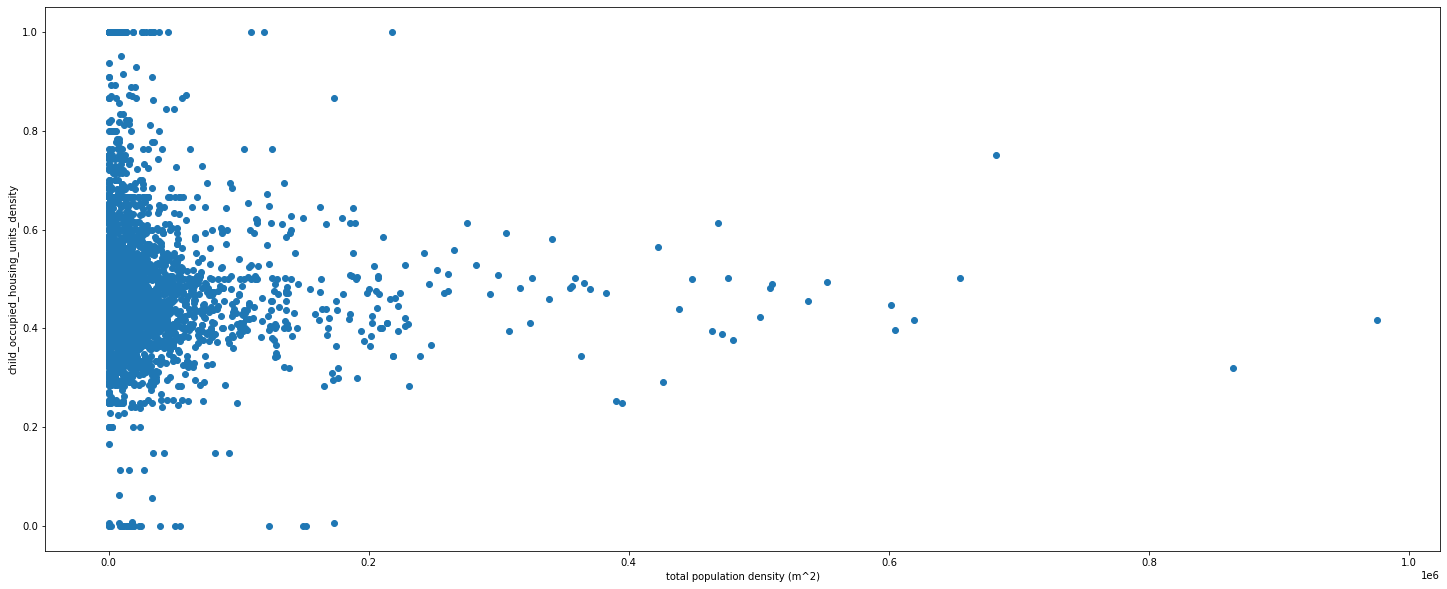

-0.03570856122001112


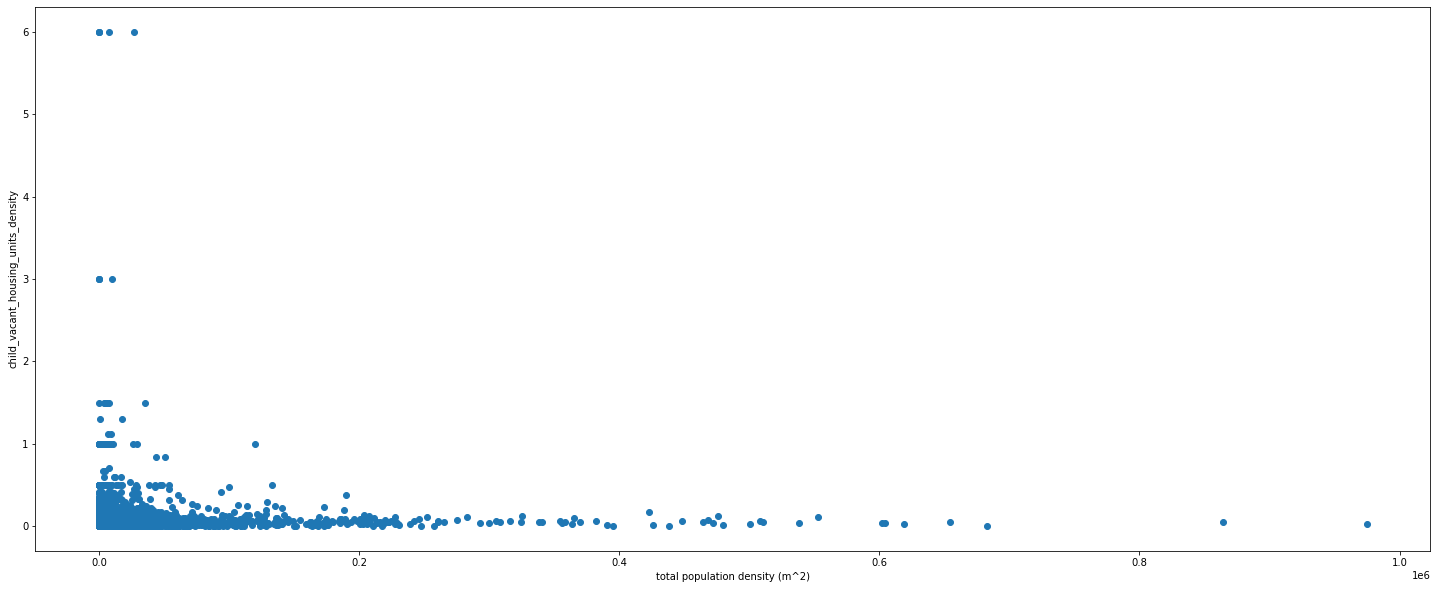

child_total_pop_density_per_sq_meters=1.0
child_hisp_latino_density=nan
child_not_hisp_latino_density=-0.013130521880336738
child_pop_one_race_density=0.01755050323001777
child_white_alone_density=0.053889300643098596
child_black_africamer_alone_density=-0.04464663752581981
child_amerind_aknat_alone_density=-0.006865122811055788
child_asian_alone_density=-0.015030636979101304
child_nathaw_pacisl_alone_density=-0.011749010231276344
child_other_race_alone_density=-0.013159859591480255
child_pop_two_or_more_races_density=-0.017550503230017764
child_over18_total_pop_density=-0.03722796756715947
child_over18_hisp_latino_density=-0.02147168875724585
child_over18_not_hisp_latino_density=-0.015896802873275967
child_over18_pop_one_race_density=-0.024774004374984192
child_over18_white_alone_density=0.03495022017307877
child_over18_black_africamer_alone_density=-0.05312591486430597
child_over18_amerind_aknat_alone_density=-0.009550786222333392
child_over18_asian_alone_density=-0.01769171724954081

In [44]:



yVals=['child_total_pop_density_per_sq_meters' ,      
        'child_hisp_latino_density',
        'child_not_hisp_latino_density',
        'child_pop_one_race_density',     
        'child_white_alone_density',
        'child_black_africamer_alone_density',
        'child_amerind_aknat_alone_density',
        'child_asian_alone_density',
        'child_nathaw_pacisl_alone_density',
        'child_other_race_alone_density',
        'child_pop_two_or_more_races_density',
        'child_over18_total_pop_density',
        'child_over18_hisp_latino_density',
        'child_over18_not_hisp_latino_density',
        'child_over18_pop_one_race_density',
        'child_over18_white_alone_density',
        'child_over18_black_africamer_alone_density',
        'child_over18_amerind_aknat_alone_density',
        'child_over18_asian_alone_density',
        'child_over18_nathaw_pacisl_alone_density',
        'child_over18_other_race_alone_density',
        'child_over18_pop_two_or_more_races_density',
        'child_total_housing_units_density',
        'child_occupied_housing_units_density',
        'child_vacant_housing_units_density',
      ]

import numpy as np
import scipy.stats
import math

rvals = {}
for yValue in yVals:
    x = []
    y=[]
    try:
        for n,row in enumerate(children[yValue]):
            if math.isfinite(row):
                x.append(children['child_total_pop_density_per_sq_meters'][n])
                y.append(row)
        r,_ = scipy.stats.pearsonr(x,y)
        print(r)
        rvals[yValue]=r
    except Exception as e:
        print(e)
        
    plt.figure(figsize=(25,10))
    plt.scatter(x=children['child_total_pop_density_per_sq_meters'], y=children[yValue])
    plt.ylabel(yValue)
    plt.xlabel('total population density (m^2)')
    plt.show()

for k,v in rvals.items():
    print(f"{k}={v}")




# for yValue in yVals:
#     plt.figure(figsize=(25,10))
#     children['']
    
# #   child_total_pop_density_pr_sq_meters
    
#     plt.scatter(x=children['district'], y=children[yValue])
#     plt.ylabel(yValue)
#     plt.xlabel('Zoning District')
#     plt.show()

plt.savefig

In [ ]:
#Make the output scrollable again.

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return true;
}